In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Data Extraction

In [132]:
vacancies = pd.read_csv("../vacancies.csv")
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   title                           207 non-null    object
 1   salary                          65 non-null     object
 2   company                         207 non-null    object
 3   english_level                   189 non-null    object
 4   experience_years                207 non-null    int64 
 5   domain                          139 non-null    object
 6   job_type                        207 non-null    object
 7   company_type                    124 non-null    object
 8   country                         207 non-null    object
 9   relocation_compensation_exists  207 non-null    bool  
 10  test_task_exists                207 non-null    bool  
 11  publication_date                207 non-null    object
 12  views_count                     207 non-null    in

## Data Cleaning

In [133]:
vacancies["publication_date"] = pd.to_datetime(vacancies["publication_date"])
vacancies[["min_salary", "max_salary"]] = vacancies["salary"].str.extract(r"(\d+), (\d+)")
vacancies[["min_salary", "max_salary"]] = vacancies[["min_salary", "max_salary"]].astype("float")
vacancies["avg_salary"] = vacancies[["min_salary", "max_salary"]].mean(axis=1)
vacancies

,title,salary,company,english_level,experience_years,domain,job_type,company_type,country,relocation_compensation_exists,test_task_exists,publication_date,views_count,applicant_count,technologies,min_salary,max_salary,avg_salary
0,Team Lead Python Developer,NaN,Deep Knowledge Group,Upper-Intermediate,2,Machine Learning / Big Data,Тільки віддалено,NaN,Україна,False,False,2023-12-08,10,2,"Python,SQl",NaN,NaN,NaN
1,Python developer,"[2000, 3500]",Software Development Hub,Intermediate,3,SaaS,Тільки віддалено,Outsource,Україна,False,False,2023-12-06,135,37,"Django,Docker,Go,NoSQL,PostgreSQL,Python,Redis...",2000.0,3500.0,2750.0
2,Staff Software Engineer (Python/Django strong ...,NaN,Zoolatech,Upper-Intermediate,5,E-commerce / Marketplace,Office або Remote,Outsource,Україна,False,False,2023-12-06,27,4,"CI/CD,Chef,Data Modeling,Django,Go,PostgreSQL,...",NaN,NaN,NaN
3,AI Developer,NaN,Devico,Upper-Intermediate,5,NaN,Тільки віддалено,Outsource,Україна,False,False,2023-12-06,51,8,"Algorithms,Go,JavaScript,Machine learning,Python",NaN,NaN,NaN
4,Senior/Principal Python Developer (AdTech),NaN,Sigma Software,Upper-Intermediate,5,Advertising / Marketing,Office або Remote,Outsource,Україна,False,True,2023-12-06,28,7,"AWS,Go,JavaScript,Python,React,SQl,TypeScript",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Senior Python Software Engineer with Data Scie...,"[3500, 5000]",Binariks,Upper-Intermediate,5,Fintech,Office або Remote,Outsource,Україна,False,False,2023-11-08,23,1,Python,3500.0,5000.0,4250.0
203,Senior (AI ML) Developer,NaN,Fluvius,Upper-Intermediate,5,NaN,Тільки віддалено,Outstaff,Україна,False,False,2023-11-08,57,5,"Algorithms,Go,JS,JavaScript,Machine learning,P...",NaN,NaN,NaN
204,FullStack Developer (Python + React or Angular),NaN,DataArt,Intermediate,5,Fintech,Office або Remote,Outsource,"Болгарія,Латвія,Польща,Україна",False,False,2023-11-09,46,6,"Agile,Angular,CSS,Go,HTML,JS,JavaScript,Micros...",NaN,NaN,NaN
205,Middle Python Developer,NaN,Dataforest,Intermediate,2,Machine Learning / Big Data,Office або Remote,Outsource,"Польща,Україна",False,False,2023-11-09,233,29,"AWS,Celery,Flask,Flask-RESTful,HTML,Linux,Post...",NaN,NaN,NaN


## Data Wrangling

### Preparation for Technologies Analysis

In [134]:
def visualize_top_technologies(
    df: pd.DataFrame, 
    title: str,
) -> None:
    plt.figure(figsize=(16, 6))
    df.plot(kind="bar", color="blue")
    plt.title(title)
    plt.xlabel("Technology")
    plt.ylabel("Times")
    plt.show()
    
def get_top_technologies_by_experience_range(
    df: pd.DataFrame, 
    title: str,
    start: int,
    end: int,
) -> None:
    mask = (df["experience_years"] >= start) & (df["experience_years"] <= end)
    top_technologies = df[mask]["technologies"].str.split(",").explode().value_counts().head(30)
    
    visualize_top_technologies(top_technologies, title)
    

### Analysis of Top 30 Most Demanded Technologies

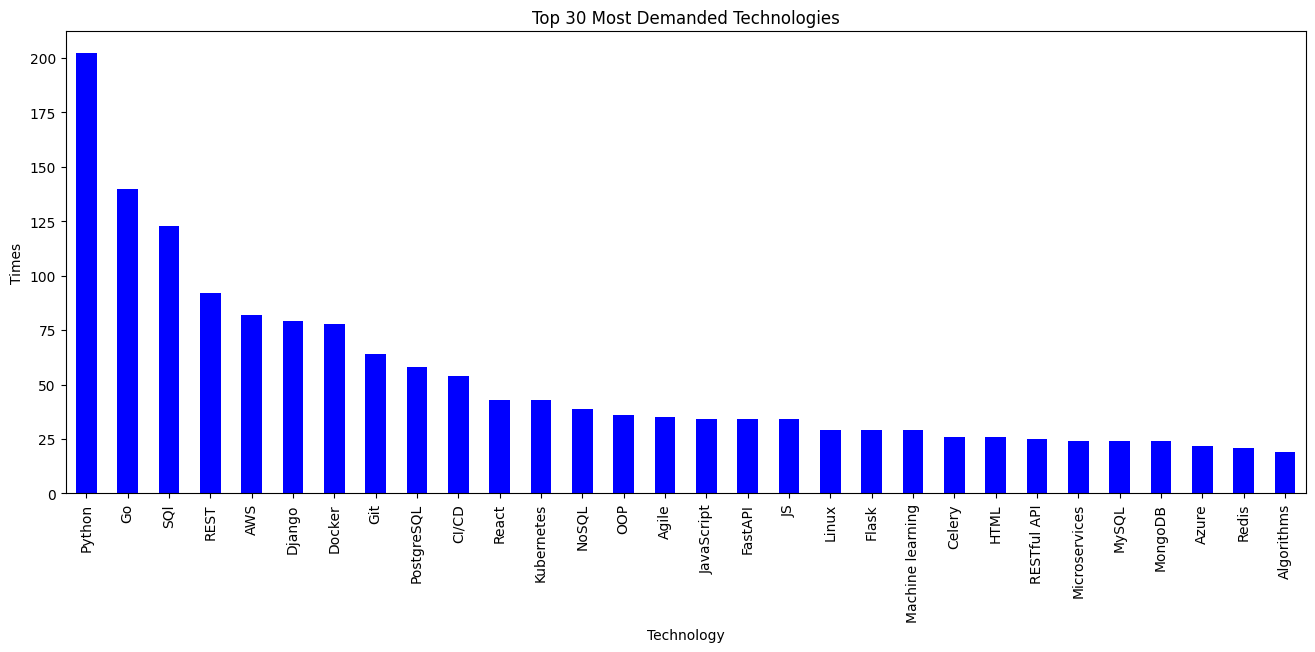

In [135]:
get_top_technologies_by_experience_range(vacancies, "Top 30 Most Demanded Technologies", 0, 5)

### Analysis of Top 30 Most Demanded Technologies for Junior Positions

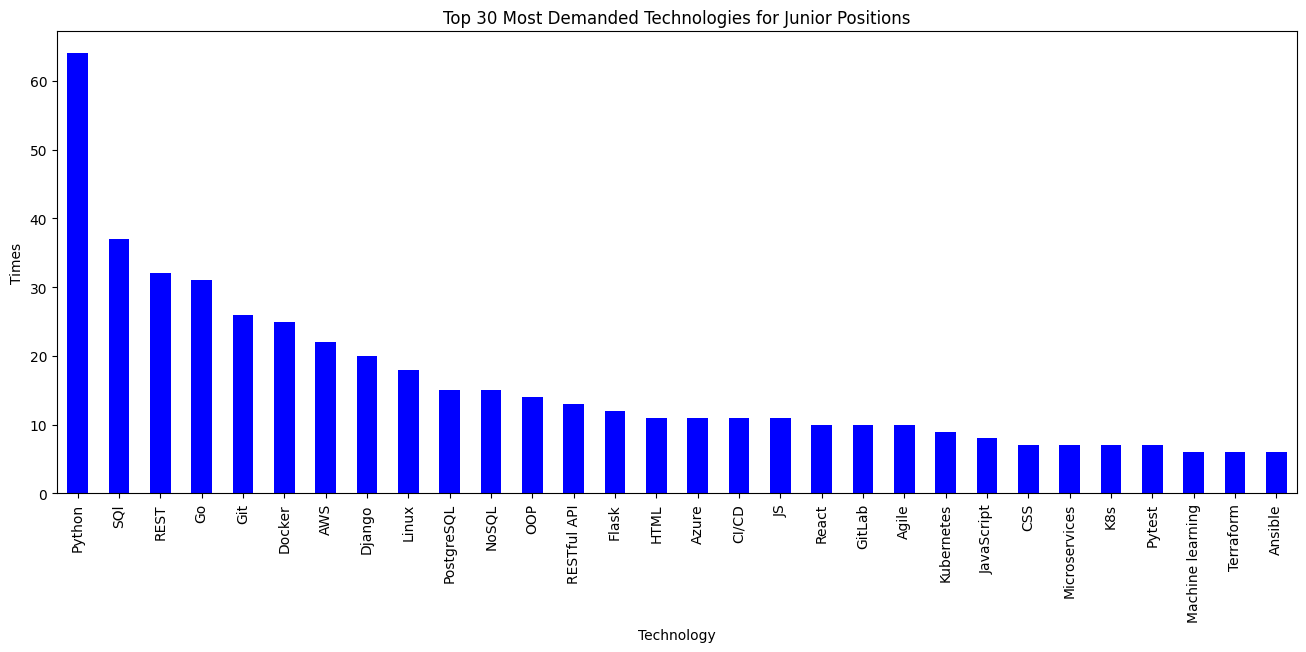

In [136]:
get_top_technologies_by_experience_range(vacancies, "Top 30 Most Demanded Technologies for Junior Positions", 1, 2)

### Analysis of Top 30 Most Demanded Technologies for Middle Positions

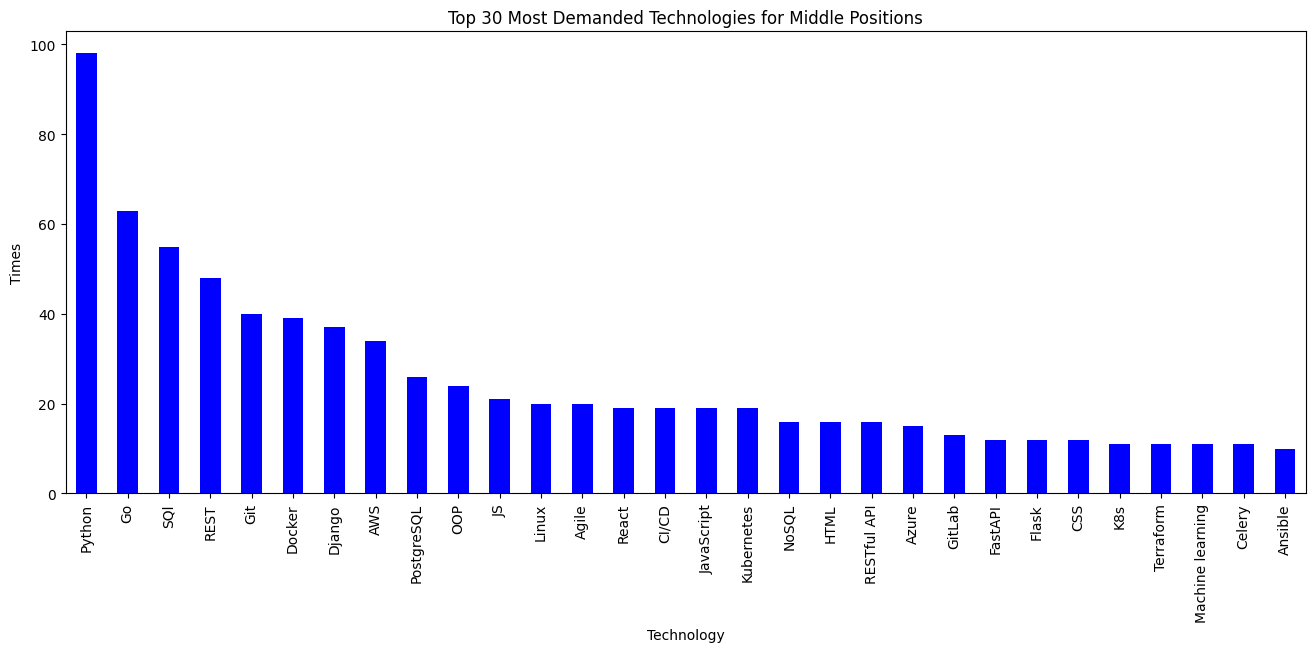

In [137]:
get_top_technologies_by_experience_range(vacancies, "Top 30 Most Demanded Technologies for Middle Positions", 2, 3)

### Analysis of Top 30 Most Demanded Technologies for Senior Positions

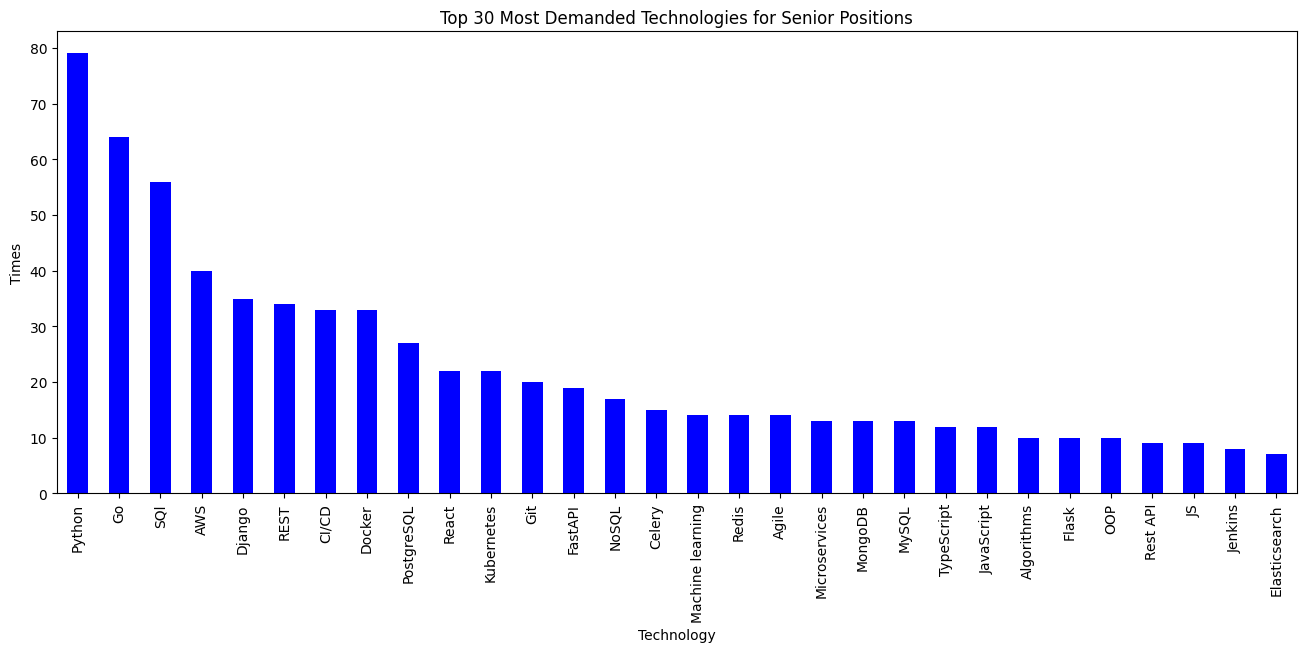

In [138]:
get_top_technologies_by_experience_range(vacancies, "Top 30 Most Demanded Technologies for Senior Positions", 5, 5)

### Analysis of Correlations between Views Counts, Applicant Count, Experience, and Average Salary

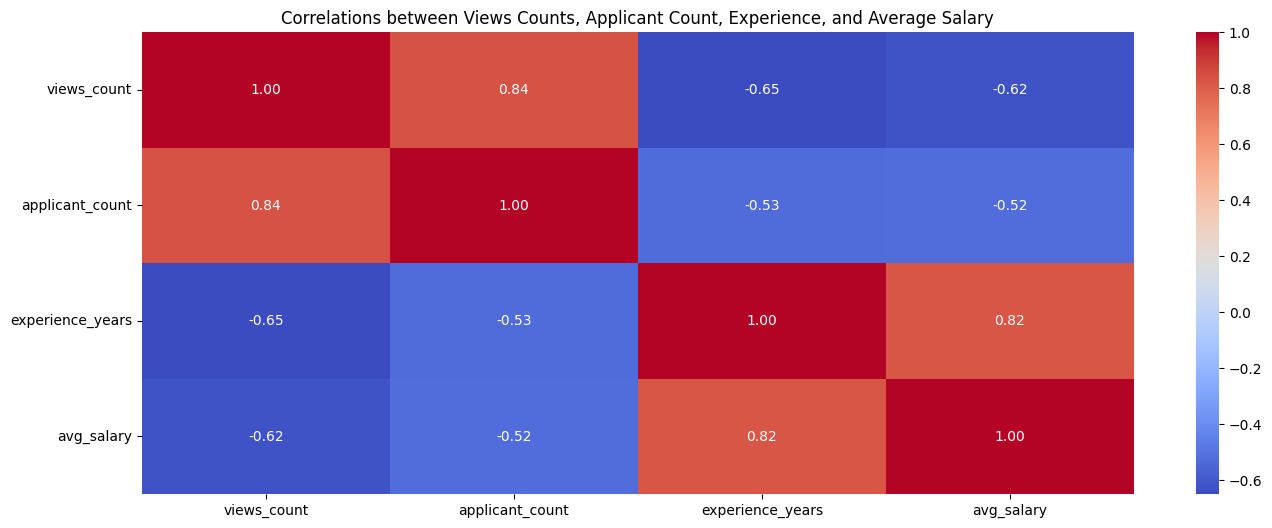

In [139]:
corr = vacancies[["views_count", "applicant_count", "experience_years", "avg_salary"]].corr()

plt.figure(figsize=(16, 6))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlations between Views Counts, Applicant Count, Experience, and Average Salary")
plt.show()

### Analysis of the demand for the level of the English language

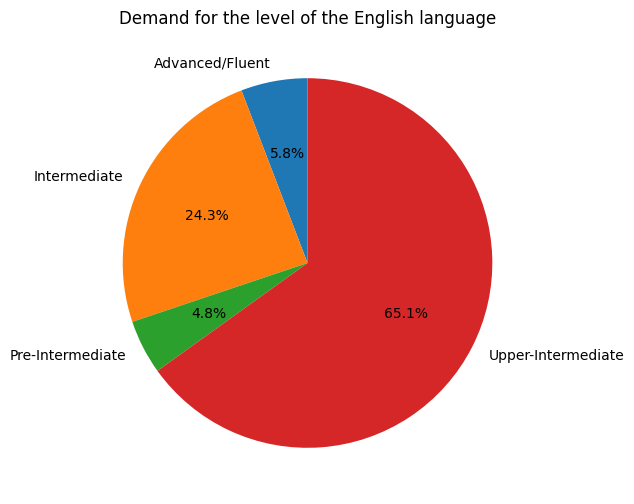

In [140]:
english_level = vacancies.groupby("english_level")["title"].count()

plt.figure(figsize=(12, 6))
plt.pie(
    english_level.values,
    labels=english_level.index,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Demand for the level of the English language")
plt.show()

### Analysis of the demand for the level of experience

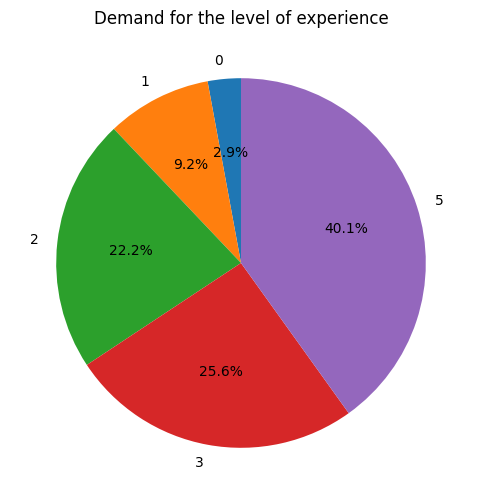

In [141]:
experience_years = vacancies.groupby("experience_years")["title"].count()

plt.figure(figsize=(12, 6))
plt.pie(
    experience_years.values,
    labels=experience_years.index,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Demand for the level of experience")
plt.show()

### Dependence of the number of publications on the day of the week

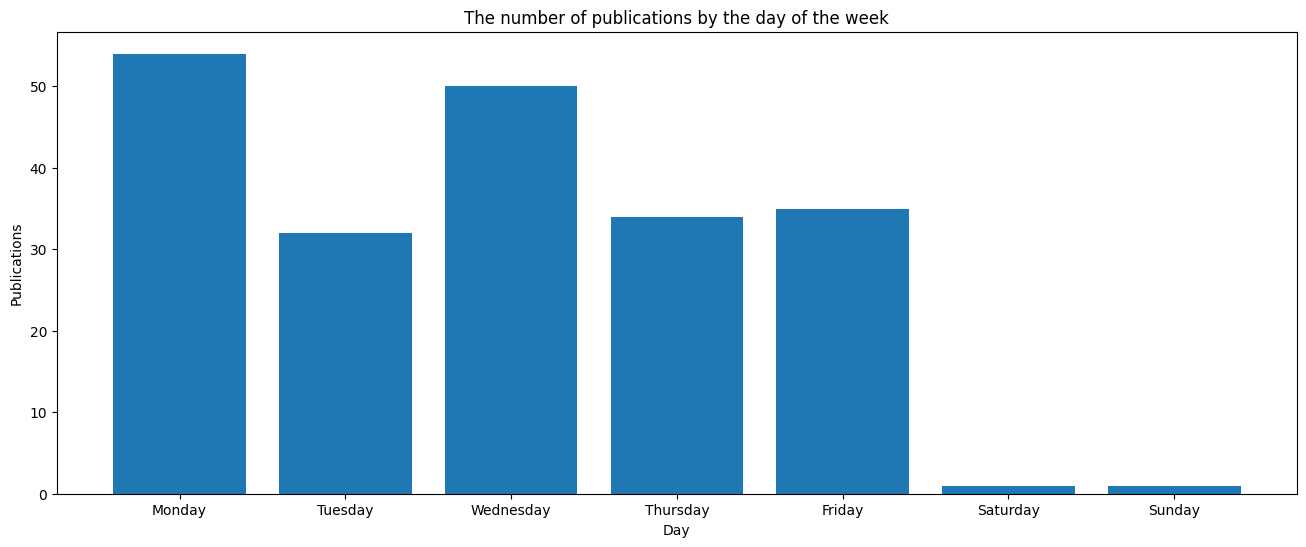

In [142]:
day_map = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
vacancies["publication_day"] = vacancies["publication_date"].dt.day_name()

publication_count_by_the_day = vacancies.groupby("publication_day")["title"].count().reindex(day_map)

plt.figure(figsize=(16, 6))
plt.bar(
    publication_count_by_the_day.index,
    publication_count_by_the_day.values,
)
plt.title("The number of publications by the day of the week")
plt.xlabel("Day")
plt.ylabel("Publications")
plt.show()